In [111]:
import pandas as pd
import sqlite3

In [112]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [113]:
com = pd.io.sql.read_sql("select timestamp from checker WHERE uid LIKE 'user_%'", con)
commits = pd.DataFrame(pd.to_datetime(com['timestamp']).dt.date)
commits['hour'] = pd.to_datetime(com['timestamp']).dt.hour

labels = ['night', 'morning', 'afternoon', 'evening']
bins = [0, 4, 10, 17, 24]
commits['daytime'] = pd.cut(commits['hour'], labels=labels, bins=bins, include_lowest=True, right=False)
commits.rename(columns={'timestamp':'date'}, inplace=True)
per_day = commits.groupby(['date']).count().reset_index()
com_day = commits.groupby(['daytime']).count().reset_index()
commits = commits.groupby(['date', 'daytime']).count().reset_index()
commits

,date,daytime,hour
0,2020-04-17,night,0
1,2020-04-17,morning,13
2,2020-04-17,afternoon,10
3,2020-04-17,evening,0
4,2020-04-18,night,0
...,...,...,...
135,2020-05-20,evening,10
136,2020-05-21,night,0
137,2020-05-21,morning,1
138,2020-05-21,afternoon,27


In [114]:
data = pd.pivot(commits, values='hour', index='date', columns='daytime')
data

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


,daytime,date,hour
0,night,21,21
1,morning,184,184
2,afternoon,1391,1391
3,evening,1611,1611


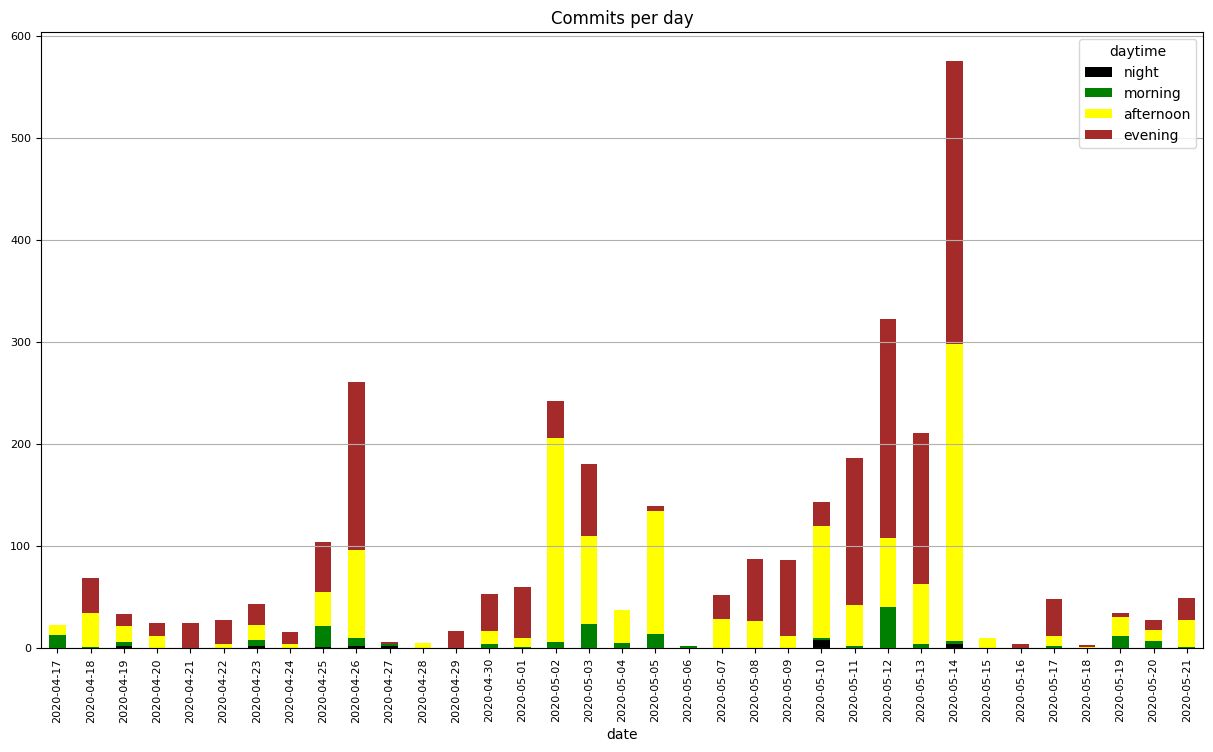

In [115]:
data.plot(kind='bar', stacked=True, fontsize=8, figsize=(15,8), title='Commits per day',
    color=['black', 'green', 'yellow', 'brown']).grid(axis='y')
com_day

In [116]:

data.sum()

daytime
night          21
morning       184
afternoon    1391
evening      1611
dtype: int64

<h2>“How many times was the number of views larger than 150?”</h2><br>
The answer is evening and afternoon

In [117]:
data.loc[data['evening'] > data['afternoon']].sum(axis=1).idxmax()

datetime.date(2020, 5, 12)

<h2>Which day has:<h2><br>
∗ the most number of commits<br>
∗ and at the same time, the number of commits in the evening is higher
than in the afternoon?<br>
Answer: 2020-05-12

In [118]:
# con.close()